In [1]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
from itertools import tee, izip

PATH_TO_IMG = "/home/blagojce/image.png"

In [2]:
img = cv2.imread(PATH_TO_IMG, cv2.IMREAD_GRAYSCALE)

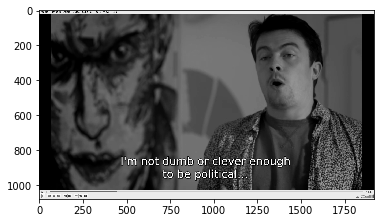

In [3]:
plt.imshow(img, cmap='gray')
plt.show()

In [4]:
def pairwise(iterable):
    "s -> (s0,s1), (s1,s2), (s2, s3), ..."
    a, b = tee(iterable)
    next(b, None)
    return izip(a, b)

In [5]:
def get_the_function(points):
    func = {}
    
    for p1, p2 in pairwise(points):
        a = (p2[1]-p1[1])/(p2[0]-p1[0])
        b = p1[1]-a*p1[0]
        func[p2[0]] = (a, b)
        
    return func

In [6]:
def stretch_pixel(pixel, func):
    for key in func.keys():
        if pixel <= key:
            return pixel*func[key][0] + func[key][1]
    return -1

In [7]:
#arguments: the image, and list of points as touples (a, ya), (b, yb) etc., w/o (0, 0) and (255, 255)
def contrast_stretching(image, points):
    points.insert(0, (0., 0.))
    points.append((255., 255.))
    new_img = image.copy()
    
    #coef for the function
    func = get_the_function(points)
    
    m, n = image.shape
    for i in range(m):
        for j in range(n):
            new_img[i][j] = stretch_pixel(image[i][j], func)
    
    return new_img
    

new_img = contrast_stretching(img, [(50., 30.), (150., 200.)])

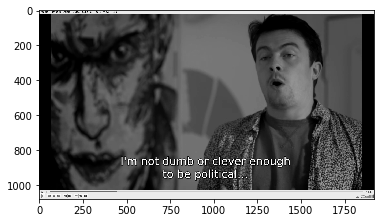

In [10]:
plt.imshow(img, cmap='gray')
plt.show()

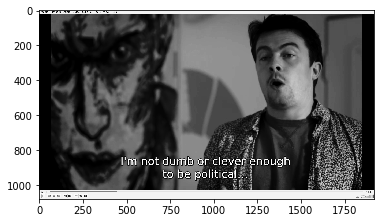

In [11]:
plt.imshow(new_img, cmap='gray')
plt.show()